# FordGo Bike Data Visualization
## by Pradeep Gurunathan

## Investigation Overview

> In this investigation, I want to look at the common customer behaviour & characteristics of the Bay Area FordGoBike system. The main focus of my investigation is when bikes were in high demand on the timely basis(month, weekday, hour) for the both types of members.

## Dataset Overview
> The data consists of approximately FordGoBike's 18,50,000 bike rides for public from Jan 2018 to Dec 2018. The features include the trip start/end time, start/end station, duration in seconds as well as additional information such as user type, gender, and birth date. Approximately, 114,000 data points were removed from the analysis due to inconsistencies, such as inaccurate birth date, and a few columns having NaN values.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobikes_master=pd.read_csv('fordgobike_master.csv')

#### 1. let's look at the user type split for FordGoBike sharing system¶

> <b>Observation: The bike sharing system is mainly used by subscribers (88.4%) than ocassional riders (11.6%). </b>

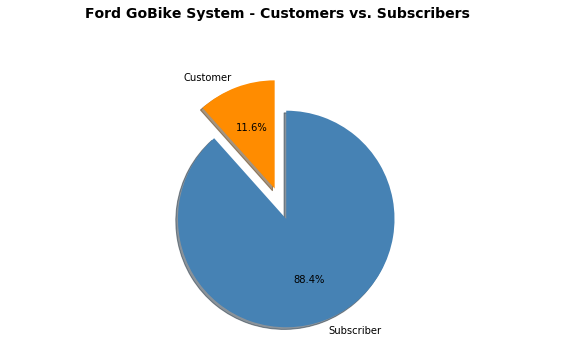

In [4]:
# Let's calculate the customer and subscriber split
customer = fordgobikes_master.query('user_type == "Customer"')['bike_id'].count()
subscriber = fordgobikes_master.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / fordgobikes_master['bike_id'].count()
subscriber_prop = subscriber / fordgobikes_master['bike_id'].count()

# Pie chart for user type
plt.figure(figsize=[10,5])

labels = ['Customer','Subscriber']
sizes = [customer_prop,subscriber_prop]
explode = (0,0.3)
colors = ['darkorange','steelblue']

plt.pie(sizes,explode=explode,labels=labels,colors=colors, autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=14, fontweight='bold');

## 2. let's look at the FordGoBike usage by weekday.¶

> <b>Observation: The FordGoBike sharing system is mainly used during the weekdays, with Tuesday to Thursday as the most popular for clocking in most number of rides. The usage of the bikes seems to drop largely on weekends indicating that the FordGoBike sharing system is used mainly as daily work commute during working days.</b>

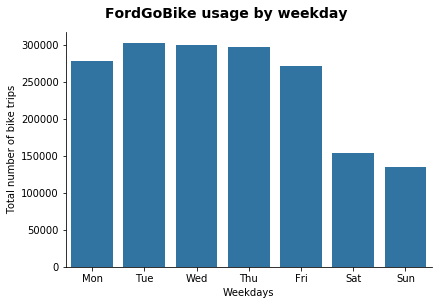

In [8]:
base_color = sns.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=fordgobikes_master,x='start_time_weekday',kind='count',color=base_color,order=weekday,height=4, aspect=6/4)
g.set_axis_labels('Weekdays','Total number of bike trips')
g.fig.suptitle('FordGoBike usage by weekday',y=1.05,fontsize=14,fontweight='bold')
g.set_xticklabels(rotation=0);

## 3. let's look at the hourly usage throughout the week of FordGoBike bikes as per user type

> <b>Observation: </b>The plot perfectly summarizes the different trends altogether for customers and subscribers I was visualizing in the above plots.

><b>Customers ride the FordGoBikes more often on weekends:</b>
>- Weekdays(Mon-Fri): Most rides happen around 8-9am and 5-6pm with the peak on Fridays around 5pm.
>- Weekends(Sat-Sun): Most rides happen between 11am - 6pm with the peak on Saturdays around 1pm - 2pm.

><b>Subscribers use the bike sharing system mostly on weekdays:</b>
>- Weekdays(Mon-Fri): Most rides happen around 8-9am and 5-6pm with the peak on Tuesdays around 8am.
>- Weekends(Sat-Sun): The bikes are hardly rented during the weekends as most of them use the bikes for daily work commute.

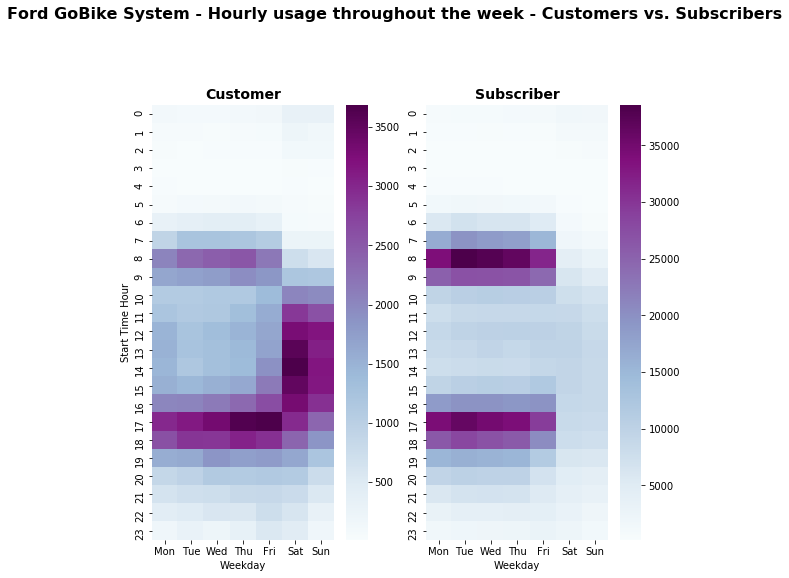

In [10]:
# Let's set the weekday order
fordgobikes_master['start_time_weekday'] =  pd.Categorical(fordgobikes_master['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Ford GoBike System - Hourly usage throughout the week - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


#Plotting a heatmap for Customers
plt.subplot(1,2,1)
df_customer = fordgobikes_master.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot('start_time_hour','start_time_weekday','bike_id')
sns.heatmap(df_customer,cmap='BuPu')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour');


#Plotting a heatmap for Subscribers
plt.subplot(1,2,2)
df_subscriber = fordgobikes_master.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot('start_time_hour','start_time_weekday','bike_id')
sns.heatmap(df_subscriber,cmap='BuPu')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('');

## 4. let's look at the age distribution of users of FordGoBike bikes as per user type.
> <b>Subscribers</b> have a diverse range of ages, while <b>Customers</b> tends to have mostly younger users (most are under the 31 threshold). <br>The Subscribers user group is more spread out between varying ages with plenty of users in their mid-fifities.

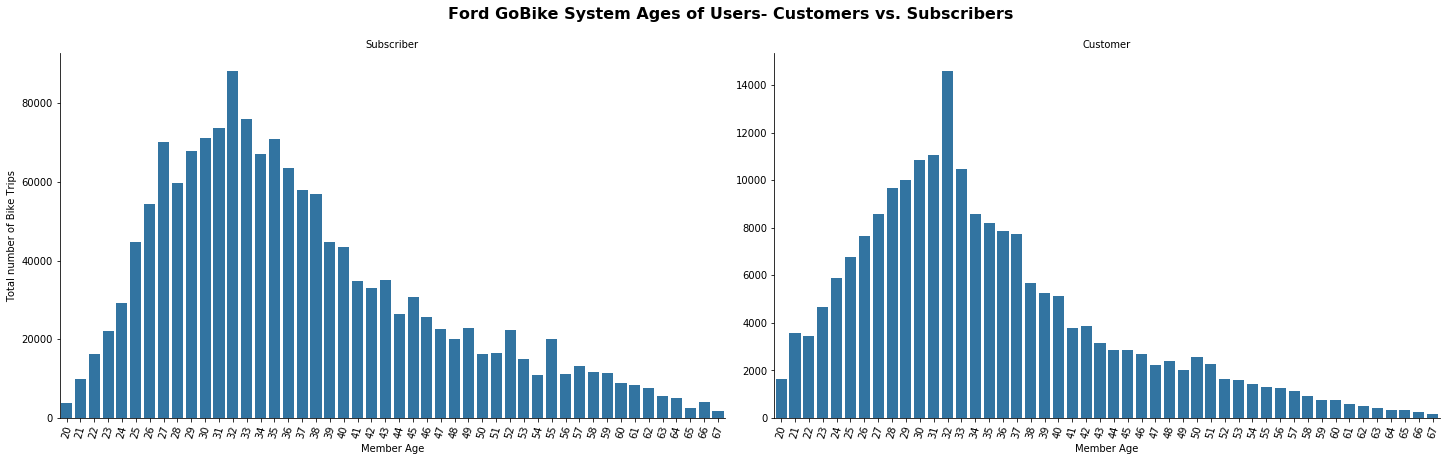

In [12]:
g = sns.catplot(data=fordgobikes_master, x = 'member_age', col='user_type', kind='count', sharey = False, color = base_color, height=6, aspect=10/6);

g.set_axis_labels('Member Age', 'Total number of Bike Trips')
g.set_titles('{col_name}')

g.fig.suptitle('Ford GoBike System Ages of Users- Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=75);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!